In [1]:
#clone repository
#!git clone https://github.com/jaimesabalimperial/jaisalab.git
#%cd jaisalab/ 

In [2]:
# Install pip packages in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install -r env/requirements.txt

In [3]:
from jaisalab.evaluation.plotter import RLPlotter
from jaisalab.evaluation import Evaluator, SeedEvaluator
from jaisalab.utils.eval import get_snapshot_dirs

import numpy as np
import pandas as pd
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt

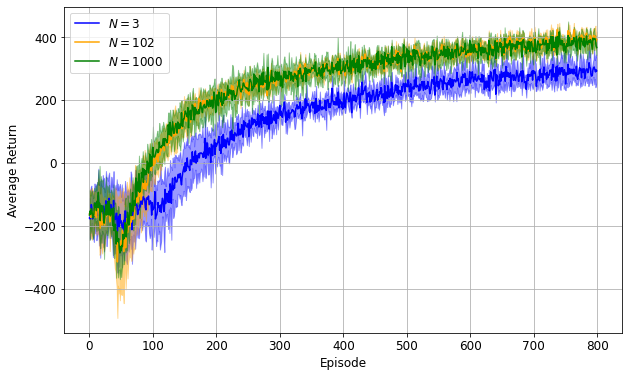

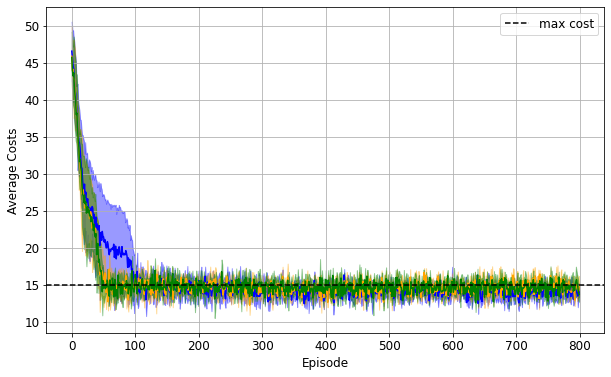

In [6]:
# N
N_fdirs = ['dcpo_N=3_backlog', 'dcpo_beta100.0_backlog', 'dcpo_N=1000_backlog']
N_labels = [r'$N = 3$', r'$N = 102$', r'$N = 1000$']
N_dirs = [f'experiments/data{i}/' for i in range(1,6)]

N_exp = {'fdir': N_fdirs, 'data_dir': N_dirs}

plotter = RLPlotter(**N_exp)
plotter.plot_returns(figsize=(10,6), fontsize=12, custom_labels=N_labels)
plotter.plot_costs(cost_lim=15, use_legend=False, figsize=(10,6), fontsize=12)

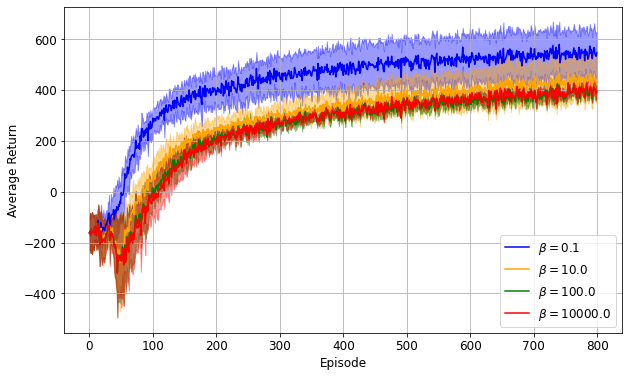

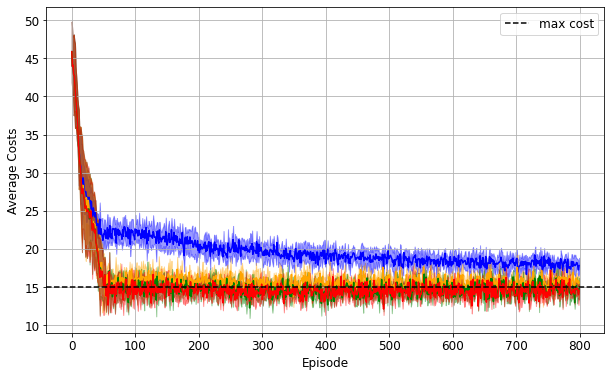

In [ ]:
#beta 
beta_fdirs = [ 'dcpo_beta0.1_backlog','dcpo_beta10.0_backlog', 'dcpo_beta100.0_backlog', 'dcpo_beta10000.0_backlog']
beta_labels = [r'$\beta = 0.1$', r'$\beta = 10.0$', r'$\beta = 100.0$', r'$\beta = 10000.0$']
beta_dirs = [f'experiments/data{i}/' for i in range(1,6)]

beta_exp = {'fdir': beta_fdirs, 'data_dir': beta_dirs}
plotter = RLPlotter(**beta_exp)
plotter.plot_returns(figsize=(10,6), fontsize=12, custom_labels=beta_labels)
plotter.plot_costs(cost_lim=15, use_legend=False, figsize=(10,6), fontsize=12)

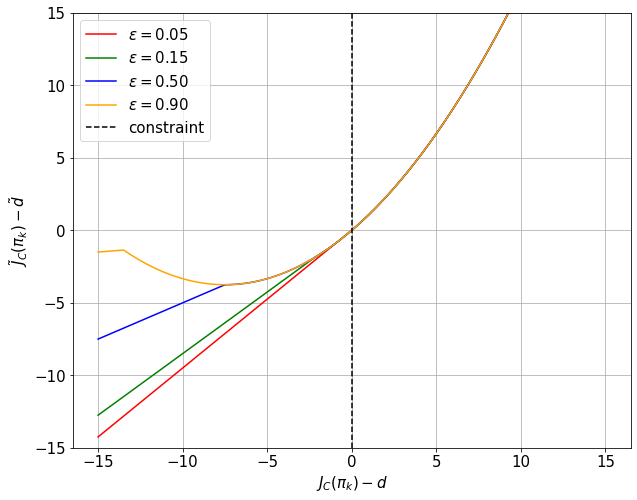

In [ ]:
beta = 1

eps_vals = [0.05, 0.15, 0.50, 0.9]
colors = ['r', 'g', 'b', 'orange']
plt.figure(figsize=(10,8))
plt.grid()
for i, eps in enumerate(eps_vals):
    def k(p, eps=eps, beta=beta):
        if beta * p < -eps:
            return -eps 
        else: 
            return beta * p

    p = np.linspace(-1, 1, 200)
    k_array = list(map(k, p))
    constraint = np.linspace(-15, 15, 200)
    reshaped_constraint = constraint * (np.ones(len(k_array)) + k_array)
    plt.plot(constraint, reshaped_constraint, color=colors[i], label=r'$\epsilon = {:.2f}$'.format(eps)); 

plt.xlabel(r'$J_C(\pi_k) - d$', fontsize=15)
plt.ylabel(r'$\tilde{J}_C(\pi_k) - \tilde{d}$', fontsize=15)
plt.axvline(x=0, linestyle='dashed', color='black', label='constraint')
plt.legend(loc='best')
plt.ylim(-15, 15)
plt.savefig('plots/epsilon_effect.png');

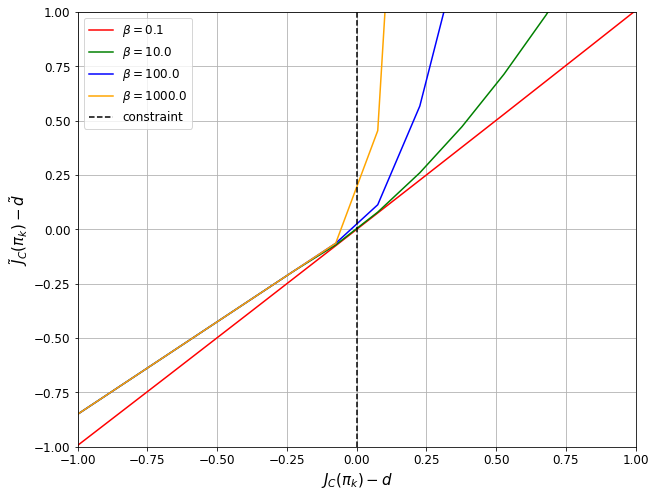

In [ ]:
eps = 0.15

beta_vals = [0.1, 10, 100, 1000]
colors = ['r', 'g', 'b', 'orange']
plt.figure(figsize=(10,8))
plt.grid()
for i, beta in enumerate(beta_vals):
    def k(p, eps=eps, beta=beta):
        if beta * p < -eps :
            return -eps 
        else: 
            return beta * p

    p = np.linspace(-1, 1, 200)
    k_array = list(map(k, p))
    constraint = np.linspace(-15, +15, 200)
    reshaped_constraint = constraint * (np.ones(len(k_array)) + k_array)
    plt.plot(constraint, reshaped_constraint, color=colors[i], label=r'$\beta = {:.1f}$'.format(beta)); 

plt.xlabel(r'$J_C(\pi_k) - d$', fontsize=15)
plt.ylabel(r'$\tilde{J}_C(\pi_k) - \tilde{d}$', fontsize=15)
plt.axvline(x=0, linestyle='dashed', color='black', label='constraint')
plt.legend(loc='best')
plt.ylim(-1, 1)
plt.xlim(-1,1)
plt.savefig('plots/beta_effect.png');

[392.12555 598.2323  618.9882 ]
[ 25.162302  64.57687  107.540115]
[14.788572 18.885715 18.634285]
[1.4115098 1.1236964 0.6999473]


NameError: name 'final_costs' is not defined

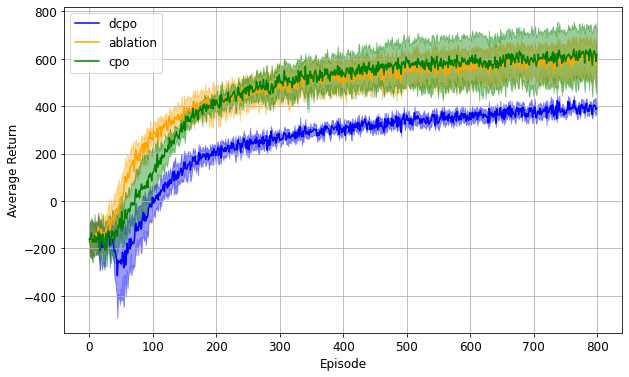

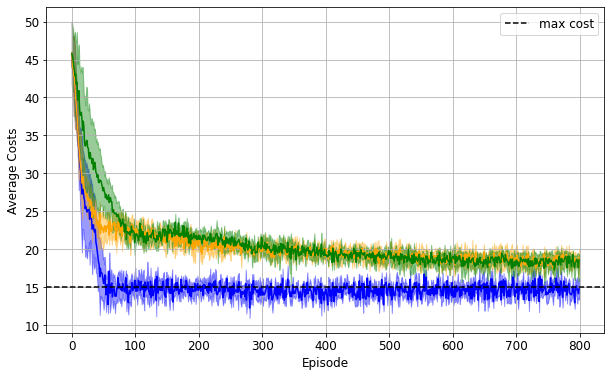

In [ ]:
#ablation
ablation_fdirs = ['dcpo_beta100.0_backlog', 'dcpo_ablation_backlog', 'cpo_backlog']
ablation_labels = ['dcpo', 'ablation', 'cpo']
ablation_dirs = [f'experiments/data{i}/' for i in range(1,6)]

ablation_exp = {'fdir': ablation_fdirs, 'data_dir': ablation_dirs}
plotter = RLPlotter(**ablation_exp)
plotter.plot_returns(figsize=(10,6), fontsize=12, custom_labels=ablation_labels)
plotter.plot_costs(cost_lim=15, use_legend=False, figsize=(10,6), fontsize=12)

[825.485   310.02817 580.69666 390.96838]
[ 46.792156  89.8978   108.41568   33.138897]
[37.688572 11.582857 18.719997 14.537145]
[2.6696923 2.3178878 0.8774545 1.1216463]


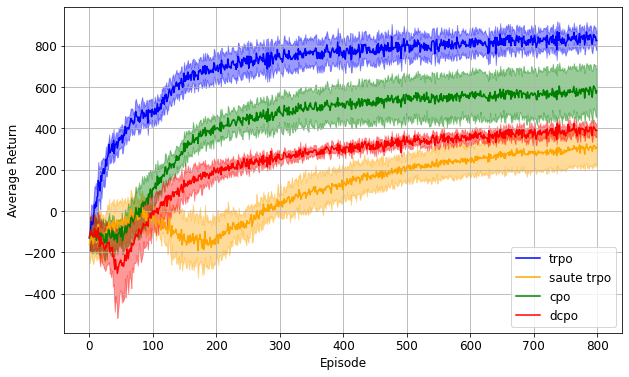

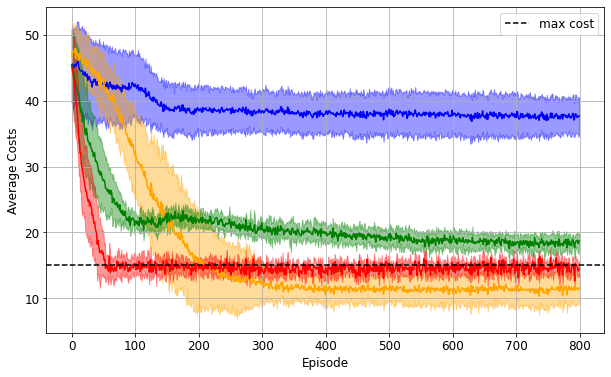

In [ ]:
#eval
eval_fdirs = ['trpo_backlog', 'saute_trpo_backlog', 'cpo_backlog', 'dcpo_beta100.0_backlog']
eval_dirs = ['experiments/data' + str(i) for i in range(1, 11)]

eval_exp = {'fdir': eval_fdirs, 'data_dir': eval_dirs}
plotter = RLPlotter(**eval_exp, savefig=False)
plotter.plot_returns(figsize=(10,6), fontsize=12)
plotter.plot_costs(cost_lim=15, use_legend=False, figsize=(10,6), fontsize=12)

## Seed Evaluation

In [ ]:
from jaisalab.evaluation import SeedEvaluator, Evaluator, RLPlotter
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.patches import Ellipse

/Users/jaimesabal/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


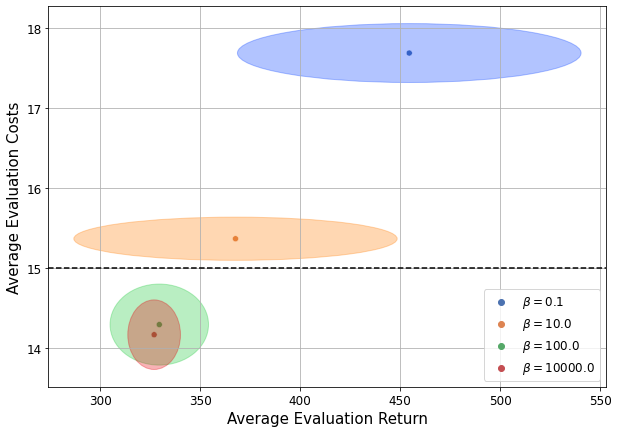

In [ ]:
#see relation 
experiments = [ 'dcpo_beta0.1_backlog','dcpo_beta10.0_backlog', 'dcpo_beta100.0_backlog', 'dcpo_beta10000.0_backlog']
beta_labels = [r'$\beta = 0.1$', r'$\beta = 10.0$', r'$\beta = 100.0$', r'$\beta = 10000.0$']
seed_evaluator = SeedEvaluator(seed_dir='experiments')

eval = defaultdict(list)
for i,exp in enumerate(experiments): 
    returns = seed_evaluator.get_returns(exp)
    costs = seed_evaluator.get_costs(exp)

    for ret, cost in zip(returns, costs):
        eval['returns'].append(ret)
        eval['costs'].append(cost)
        eval['beta'].append(beta_labels[i])

data = pd.DataFrame(eval)
means = data.groupby('beta').mean()
stds = data.groupby('beta').std()

fig, ax = plt.subplots(figsize=(10,7))
plt.grid()

colors = sns.color_palette('bright')
g = sns.scatterplot(x="returns", y="costs", hue="beta",
                data=means, palette='deep')

for (_, mean), (_, sdev), color in zip(means.iterrows(), stds.iterrows(), colors):
    ellipse = Ellipse((mean['returns'], mean['costs']), width=2*sdev['returns'], height=2*sdev['costs'],
                          color=color, alpha=0.3)
    ax.add_patch(ellipse)

g.axhline(15.0, color='black', linestyle='dashed')
plt.xlabel('Average Evaluation Return', fontsize=15)
plt.ylabel('Average Evaluation Costs', fontsize=15)
plt.legend(loc='lower right')
plt.savefig('beta_performance');

/Users/jaimesabal/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


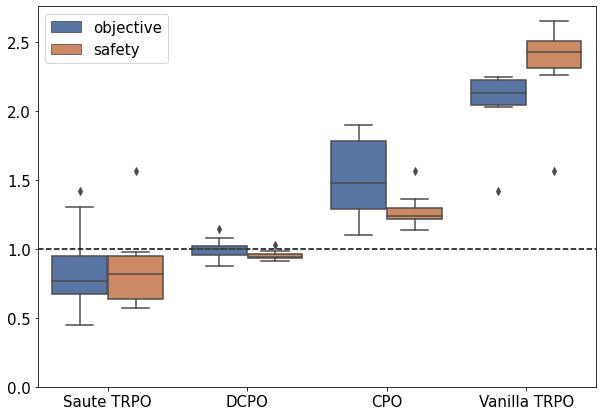

In [7]:
plotter = RLPlotter(data_dir='experiments/data2/')
exps = ['saute_trpo_backlog', 'cpo_backlog', 'dcpo_beta100.0_backlog', 'trpo_backlog']
labels = ['Saute TRPO', 'CPO', 'DCPO', 'Vanilla TRPO']
plotter.plot_evaluation(seed_dir='experiments', experiments=exps, labels=labels, fontsize=15)

In [ ]:
#rollout evaluation
#beta_vals = ['0.1', '1.0', '10.0', '100.0', '10000.0']
#snapshot_dirs = [f'experiments/data{i}/dcpo_beta100.0_backlog' for i in range(6,11)]
#for snapshot in snapshot_dirs:
#    evaluator = Evaluator(snapshot, override=True)
#    epochs = evaluator.rollout(n_epochs=30)

In [ ]:
plotter = RLPlotter(fdir='dcpo_beta100.0_backlog', data_dir='experiments/data1')
training_steps = [0, 39, 79, 799]
plotter.plot_quantiles_progression(Vmin=0, Vmax=60, metric='safety', fontsize=25,
                                   figsize=(10,8), training_steps=training_steps)